<a href="https://www.kaggle.com/code/bojanaspink/cats-vs-dogs-matplotlib-seaborn-plotly-maps?scriptVersionId=153720242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cats vs Dogs

##### This project was created with the idea of seeing comparison of households with dogs and those with cats by state in the US. 
##### It was an interesting exercise for me to put the data into a beautiful charts in python that help inform analysis and interpretation.

In [1]:
#Setting up libraries needed for this project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #creating visualizations in Python
import seaborn as sns
%matplotlib inline
from plotly.express import choropleth #creating thematic map

# Input data files are available in the read-only "../input/" directory
# Running this will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cats-vs-dogs/cats_vs_dogs.csv
/kaggle/input/state-abbreviations/state_abbrev.csv


In [2]:
df = pd.read_csv("/kaggle/input/cats-vs-dogs/cats_vs_dogs.csv")

df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [3]:
#Setup a column as index by using set_index()
df.set_index('Unnamed: 0', inplace=True)

df.head()

,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
Unnamed: 0,,,,,,,,,,,,
1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [4]:
#Getting info about the dataset (dtype, number of columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1 to 49
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   49 non-null     object 
 1   n_households            49 non-null     int64  
 2   percent_pet_households  49 non-null     float64
 3   n_pet_households        49 non-null     int64  
 4   percent_dog_owners      49 non-null     float64
 5   n_dog_households        49 non-null     int64  
 6   avg_dogs_per_household  49 non-null     float64
 7   dog_population          49 non-null     int64  
 8   percent_cat_owners      49 non-null     float64
 9   n_cat_households        49 non-null     int64  
 10  avg_cats_per_household  49 non-null     float64
 11  cat_population          49 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 5.0+ KB


In [5]:
#Checking for missing values (NaN)
df.isnull().sum()

state                     0
n_households              0
percent_pet_households    0
n_pet_households          0
percent_dog_owners        0
n_dog_households          0
avg_dogs_per_household    0
dog_population            0
percent_cat_owners        0
n_cat_households          0
avg_cats_per_household    0
cat_population            0
dtype: int64

In [6]:
#Making a new dataframe and visual of Cats vs Dogs Households by State

df1 = df[['state', 'n_dog_households', 'n_cat_households']]

In [7]:
df1.head()

,state,n_dog_households,n_cat_households
Unnamed: 0,,,
1,Alabama,807,501
2,Arizona,1008,743
3,Arkansas,550,351
4,California,4260,3687
5,Colorado,845,642


<Axes: title={'center': 'Cats vs Dogs Households by State'}, xlabel='state', ylabel='Number of Households'>

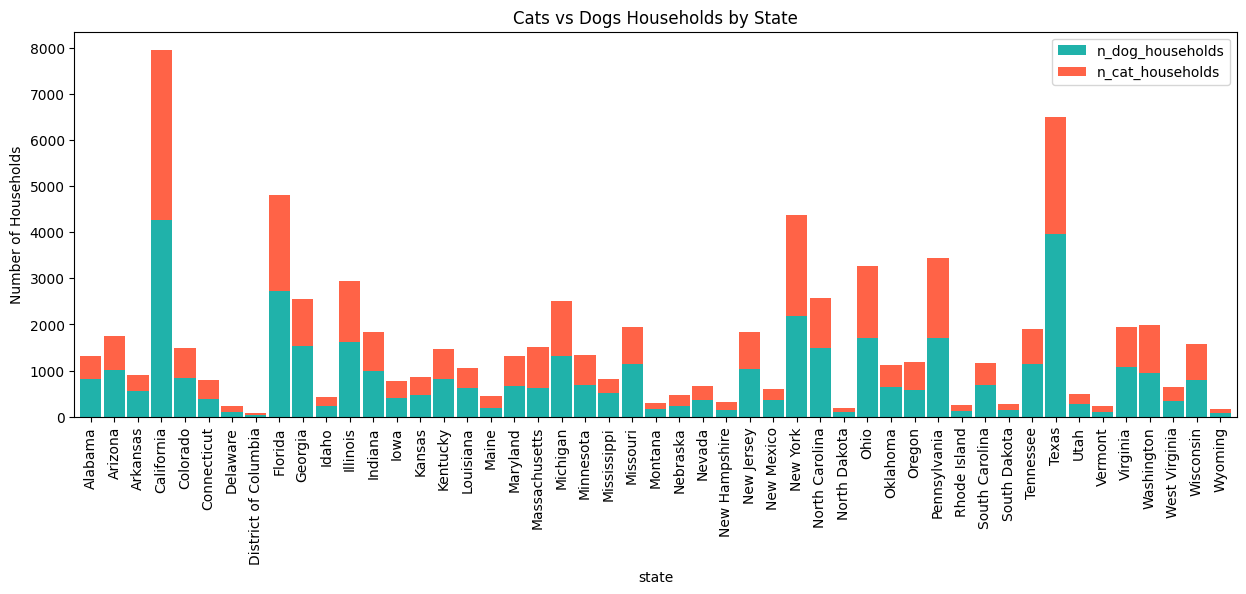

In [8]:
#plot bars in stack manner

df1.plot.bar(x='state', stacked=True, title='Cats vs Dogs Households by State', color=['lightseagreen', 'tomato'], width= 0.9, figsize=(15,5), ylabel='Number of Households')

In [9]:
#Merging two datasets on column 'state' to get a new column 'Abbreviation'. For making Choropleth map the 'locations' must be as two-letter state abbreviations.
df2 = df1.merge(right=pd.read_csv(filepath_or_buffer= '/kaggle/input/state-abbreviations/state_abbrev.csv', usecols=['State', 'Abbreviation']).rename(columns={'State':'state'}), on='state', how='inner')

In [10]:
df2.head()

,state,n_dog_households,n_cat_households,Abbreviation
0,Alabama,807,501,AL
1,Arizona,1008,743,AZ
2,Arkansas,550,351,AR
3,California,4260,3687,CA
4,Colorado,845,642,CO


In [11]:

choropleth(data_frame=df2, locations='Abbreviation', scope='usa', locationmode='USA-states', color='n_dog_households', color_continuous_scale='Blues', title='Number of Households with Dogs')


In [12]:

choropleth(data_frame=df2, locations='Abbreviation', scope='usa', locationmode='USA-states', color='n_cat_households', color_continuous_scale='Reds', title='Number of Households with Cats')


In [13]:
df.head()

,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
Unnamed: 0,,,,,,,,,,,,
1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [14]:
#Making a new dataframe to see percentage of Dog vs Cat owners in the US

df2 = df[['percent_dog_owners', 'percent_cat_owners']].mean()

df2

percent_dog_owners    36.973469
percent_cat_owners    31.642857
dtype: float64

<Axes: title={'center': 'Percent of Dog owners vs Cat owners in the US'}>

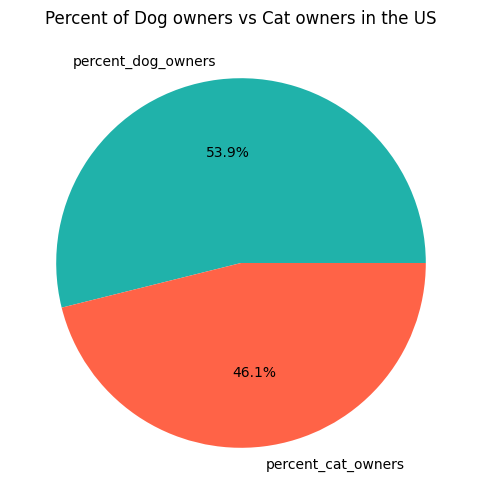

In [15]:
df2.plot.pie(title='Percent of Dog owners vs Cat owners in the US',autopct='%1.1f%%', colors=['lightseagreen', 'tomato'], figsize=(10,6))

In [16]:
#Making a new dataframe to see Average number of Dog vs Cat per Household in the US

df3 = df[['avg_dogs_per_household', 'avg_cats_per_household']].mean()

df3

avg_dogs_per_household    1.587755
avg_cats_per_household    2.040816
dtype: float64

<Axes: title={'center': 'Average number of Dogs vs Cats per household in the US'}>

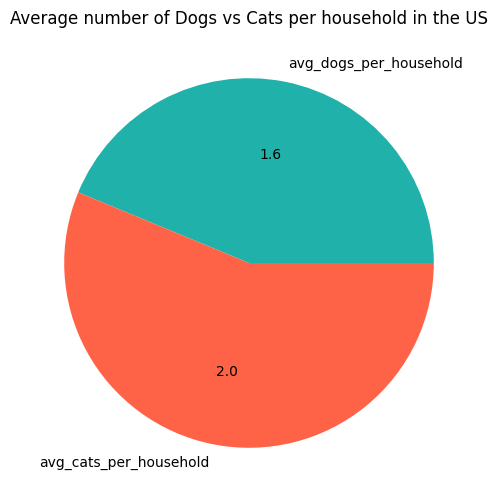

In [17]:
#to show real values insted of percentages we need to modify the 'autopct' format
df3.plot.pie(title='Average number of Dogs vs Cats per household in the US', colors=['lightseagreen', 'tomato'], autopct=lambda x: '{:.1f}'.format(x*df3.sum()/100), figsize=(10,6))

From the previous two pie charts we have seen that the percentage of dog owners is slightly higher than cat owners (53.9% vs 46.1%) but, interestingly, cat owners tend to have more cats in house than dog owners their puppies (average number of cats per household is 2.0 while for dogs that number is slightly lower and amounts to 1.6)

In [18]:
df4=df[['state','cat_population','dog_population']]
df4.head()

,state,cat_population,dog_population
Unnamed: 0,,,
1,Alabama,1252,1410
2,Arizona,1438,1798
3,Arkansas,810,1097
4,California,7118,6687
5,Colorado,1191,1349


In [19]:
#set column 'state' as index that a seaboarn heatmap can be created ('cat_population' vs 'dog_population')
df4.set_index('state',inplace=True)

df4.head()

,cat_population,dog_population
state,,
Alabama,1252,1410
Arizona,1438,1798
Arkansas,810,1097
California,7118,6687
Colorado,1191,1349


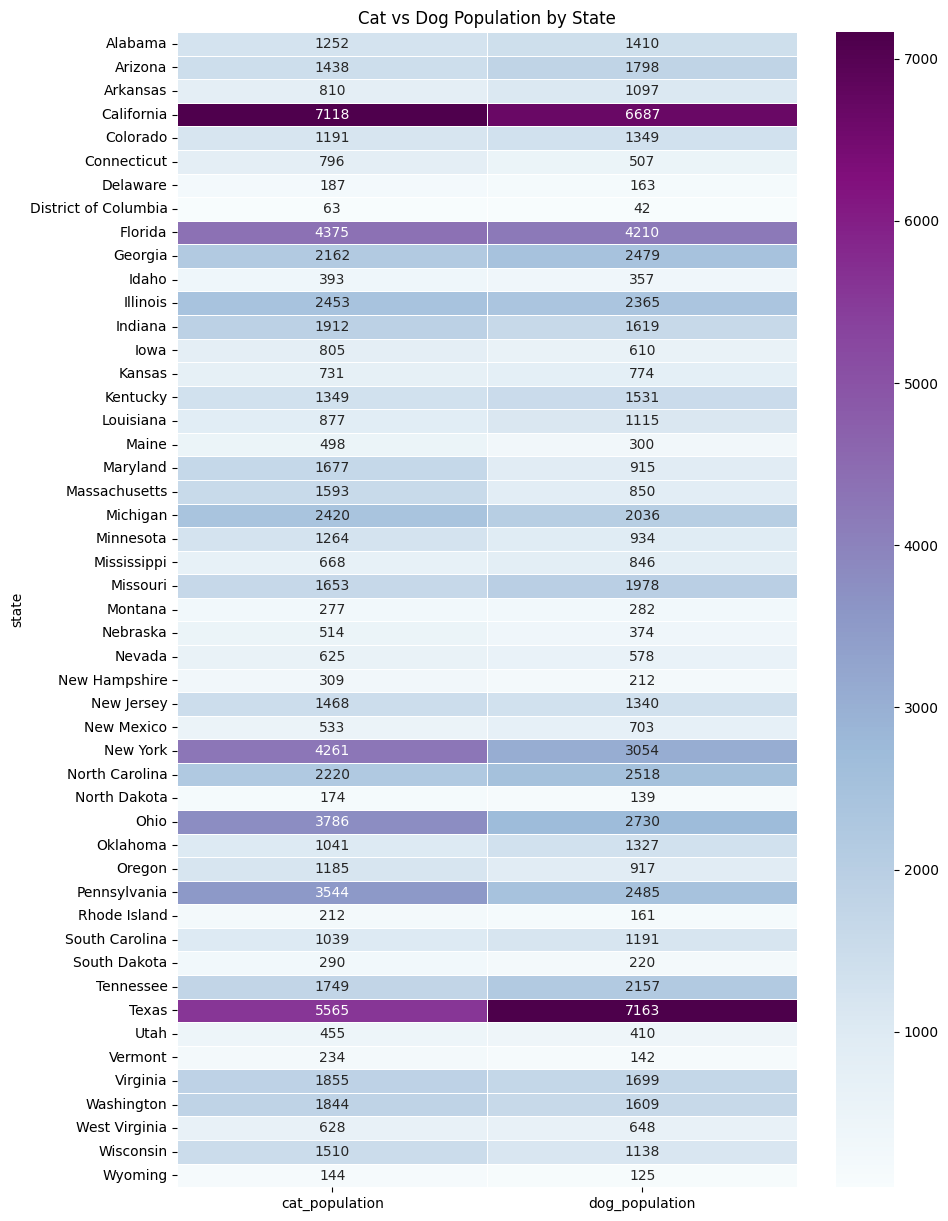

In [20]:
plt.figure(figsize=(10, 15))
sns.heatmap(df4,fmt='d', annot=True,  cmap='BuPu', linewidths=0.5)
plt.title('Cat vs Dog Population by State')
plt.show()

The heatmap created above shows that California is the state with the largest cat population while Texas is for dogs.

##### And with this I would end the project. 
##### Visualizations are a powerful way of understanding the data so here I used matplotlib, seaborn, plotly as best graphing packages available in Python for data visualization.